# Predicting Melbourne Property Prices #

This project aims to predict real estate prices in Melbourne using historical property sales data. 
We perform data cleaning, feature engineering, model training, and visual analysis to uncover the key drivers of price and evaluate predictive performance.


We begin by importing all the necessary libraries for data manipulation, visualization, and machine learning.

In [3]:
# ------------------------------
# Step 1: Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")


We load the dataset and clean it by:
- Dropping irrelevant or sparse columns
- Converting date values
- Filling missing values using median (for numeric) and mode (for categorical)

In [8]:
# ------------------------------
# Step 2: Load & Clean the Data
# ------------------------------
df = pd.read_csv("Property Sales of Melbourne City.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop columns with excessive missing values
df.drop(columns=['BuildingArea', 'YearBuilt'], inplace=True)

# Fill numerical columns with median
num_cols_median = ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                   'Lattitude', 'Longtitude', 'Propertycount']
for col in num_cols_median:
    df[col].fillna(df[col].median(), inplace=True)

# Fill 'Postcode' and 'Regionname' with mode
df['Postcode'].fillna(df['Postcode'].mode()[0], inplace=True)
df['Regionname'].fillna(df['Regionname'].mode()[0], inplace=True)

# Fill 'CouncilArea' with 'Unknown'
df['CouncilArea'].fillna('Unknown', inplace=True)

# Verify no missing values
print("Missing values handled:")
print(df.isnull().sum())



Missing values handled:
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date             11528
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64


We prepare the dataset for modelling by:
- Dropping columns that will not be used
- One-hot encoding categorical features
- Defining 

In [9]:
# ---------------------------------------
# Step 3: Feature Selection & Engineering
# ---------------------------------------
df_model = df.copy()
df_model.drop(columns=['Suburb', 'Address', 'Date', 'SellerG', 'CouncilArea'], inplace=True)
df_model = pd.get_dummies(df_model, columns=['Type', 'Method', 'Regionname'], drop_first=True)

X = df_model.drop(columns='Price')
y = df_model['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Selection Rationale**


We chose to use two models in this project for complementary reasons:

1. **Linear Regression** – for simplicity and interpretability:
   - Helps quantify the influence of each feature on price.
   - Easy to explain to stakeholders.
   - Useful when relationships are linear.

2. **Random Forest** – for prediction accuracy:
   - Captures non-linear relationships and feature interactions.
   - Handles outliers and missing data well.
   - More robust for real-world, noisy datasets like property sales.

Comparing both helps balance transparency (Linear Regression) with performance (Random Forest).
"""

We use a simple Linear Regression model to learn the relationship between property features and their sale price.

In [10]:
# ------------------------------
# Step 4: Model Training (Linear Regression)
# ------------------------------
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

We evaluate the linear regression model using MAE, RMSE, and R^2 to measure accuracy and goodness-of-fit.

In [11]:
# ------------------------------
# Step 5: Model Evaluation (Linear Regression)
# ------------------------------
y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: ${mae_lr:,.0f}")
print(f"RMSE: ${rmse_lr:,.0f}")
print(f"R^2 Score: {r2_lr:.2f}")

Linear Regression Results:
MAE: $280,697
RMSE: $410,924
R^2 Score: 0.58


We also train a Random Forest Regressor, a more powerful model capable of capturing nonlinear relationships.

In [14]:
# ------------------------------
# Step 6: Model Training (Random Forest)
# ------------------------------
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We evaluate the Random Forest model using the same metrics to compare against Linear Regression.

In [13]:
# ------------------------------
# Step 7: Model Evaluation (Random Forest)
# ------------------------------
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"MAE: ${mae_rf:,.0f}")
print(f"RMSE: ${rmse_rf:,.0f}")
print(f"R^2 Score: {r2_rf:.2f}")


Random Forest Results:
MAE: $177,355
RMSE: $295,993
R^2 Score: 0.78


We extract the linear model coefficients to identify which features most strongly influence property prices.

In [15]:
# ------------------------------
# Step 8: Feature Importance (Linear Regression)
# ------------------------------
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Influential Features (Linear Regression):")
print(coefficients.head(10))


Top Influential Features (Linear Regression):
                             Feature    Coefficient
7                          Lattitude -514944.119977
11                            Type_u -484348.714017
18      Regionname_Northern Victoria  294674.501986
10                            Type_t -278665.637470
8                         Longtitude  254510.409011
0                              Rooms  244289.297052
20  Regionname_Southern Metropolitan  242675.212737
21   Regionname_Western Metropolitan -222690.731761
16       Regionname_Eastern Victoria  193170.308390
17  Regionname_Northern Metropolitan -190184.996008


We visualise price distribution, price vs property type, price by rooms,
and predicted vs actual values to better understand trends and model behaviour.

The models we used (Linear Regression and Random Forest) influence how we interpret the visualisations:

- **Linear Regression** provides coefficients which can be ranked and visualised to understand the **magnitude and direction** of each feature’s effect on price. This supports interpretability.

- **Random Forest** gives more **accurate predictions** and helps us visualise performance by comparing actual vs predicted values. The scatterplot of predicted vs actual shows how well the model fits, especially when data is non-linear or has outliers.

These insights help create more meaningful and reliable plots when evaluating patterns in property pricing.


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


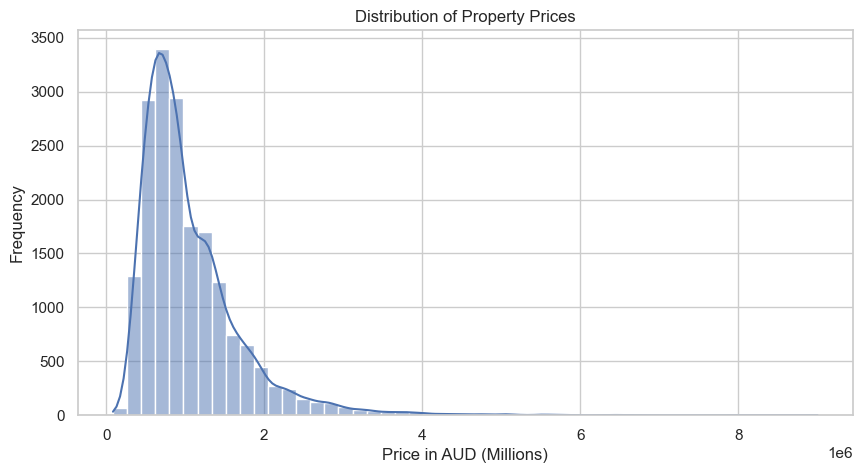

In [19]:
# ------------------------------
# Step 9: Visualisations
# ------------------------------
# 1. Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price in AUD (Millions)")
plt.ylabel("Frequency")
plt.show()




The price distribution is right-skewed, with most properties priced under $2 million. This suggests a small number of luxury homes with significantly higher prices, which may affect modeling.

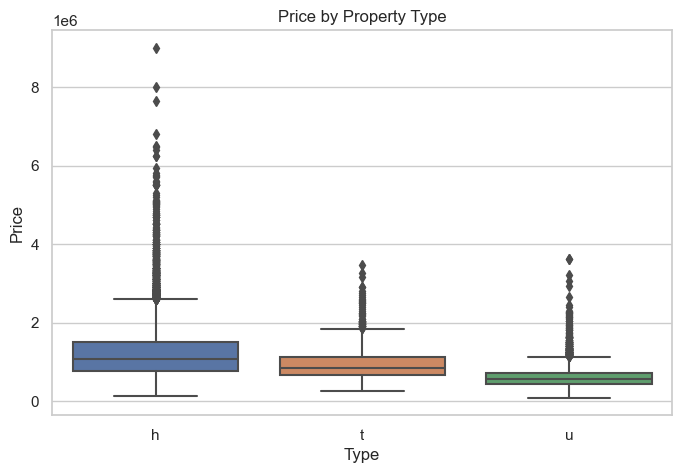

In [27]:
# 2. Average price by property type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Price', data=df)
plt.title("Price by Property Type")
plt.show()

Houses typically have higher price variability and median prices than Units or Townhouses. This could be due to larger land size or location preferences.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8896\2323338724.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rooms', y='Price', data=df, ci=None)


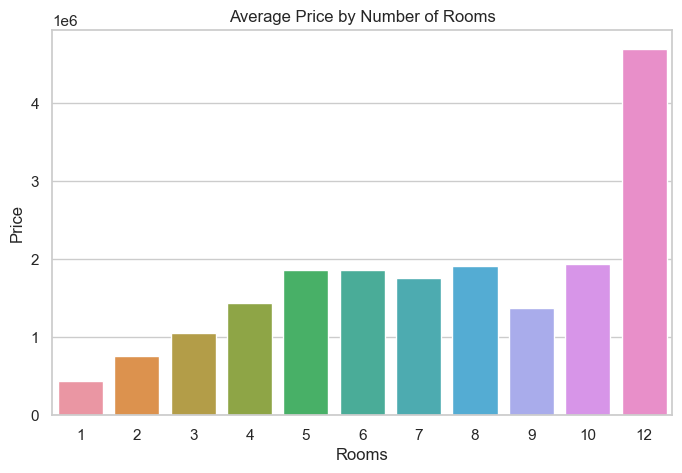

In [28]:
# 3. Average price by number of rooms
plt.figure(figsize=(8, 5))
sns.barplot(x='Rooms', y='Price', data=df, ci=None)
plt.title("Average Price by Number of Rooms")
plt.show()

More rooms generally correlate with higher property prices. However, the increase is not perfectly linear — suggesting diminishing returns or influence from other features like location.

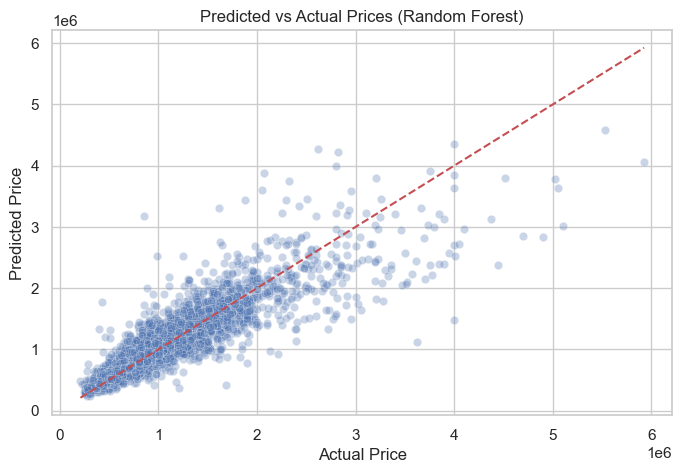

In [29]:
# 4. Prediction vs Actual Plot (Random Forest)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


The Random Forest model shows a tight clustering along the diagonal, indicating good predictive accuracy. However, some scatter suggests that very high-priced properties are harder to predict accurately.

## Summary and Conclusion

In this project, we explored and modelled real estate price data from Melbourne.

Key points:
- After data cleaning and preprocessing, we trained two models: Linear Regression and Random Forest.
- **Random Forest outperformed Linear Regression** in terms of lower MAE and RMSE, and higher R² score.
- Features such as the number of rooms, property type, and geographical location (latitude/longitude and region) were strong predictors of price.
- Visualisation of actual vs predicted prices showed that Random Forest captured complex patterns better.
- Most properties in Melbourne sell below $2 million, but a few high-end listings pull the price distribution upward.
- Property type significantly affects price: houses are typically more expensive and variable than townhouses or units.
- More rooms generally lead to higher prices, but the relationship flatte, — indicating the influence of other factors like location and land size.
- The Random Forest model produced strong predictive results, with a tight clustering of actual vs predicted values.
- However, properties at the extreme high end were less predictable, likely due to unique characteristics not fully captured in the features.